# Ecological Intelligence Change Detection

Ecological intelligence aims to develop social and environmental responsability and awareness, to think critically, to pursue cooperative learning, and to bring about behavioral change in the long-term.

Lilia Cortez, Marcia Rodríguez and Iván Pacheco applied an Ecological Intelligence test to 321 students from different campus of the Tecnológico de Monterrey. The test was applied in may and june 2025. The results are in the file 'Eco_Intel2_clean2.xlsx'. The test consists of 12 questions, but this analysis considers only questions 13 and 14 that are shown below.

* Question 13: En una escala del 1 al 10, ¿cómo consideras que cambió tu mentalidad y comportamiento respecto a la sostenibilidad, como resultado de lo que aprendiste en tu carrera profesional? (Donde 1 es nada, 10 es totalmente)
* Question 14: Da alguna razón o justificación de tu respuesta anterior.

We are going to use part of the code in Activity 10 to train a model to predict the answer to question 13 based on the answer to question 14. This code was generated with the help of GitHub Copilot in VS Code. 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from ipywidgets import Text, Output, VBox, Button, Layout
from IPython.display import display

In [3]:
# Read the Excel file
df = pd.read_excel('Eco_Intel2_clean2.xlsx')
# Display the first few rows of the DataFrame
df.head(3)

,date,student,program,campus,sex,nationality,age,holis1,holis2,holis3,...,social3,social4,econ1,econ2,econ3,change,argument,country,argument_original,argument_corrected
0,2025-05-06 15:26:17,2,LAET,Guadalajara,Mujer,Mexicana,21 a 22 años,5,4,5,...,5,5,4,5,4,10,Encontré formas de hacer negocios sostenibles ...,México,Encontré formas de hacer negocios sostenibles ...,Encontré forms de her negocios sostenibles y s...
1,2025-05-06 15:26:19,3,LAET,Guadalajara,Mujer,Mexicana,23 a 24 años,5,2,4,...,3,4,4,5,4,8,"aprendí sobre TBL, valor compartido y negocios...",México,"aprendí sobre TBL, valor compartido y negocios...","aprendí sore TBL, valor compartido y negocios ..."
2,2025-05-06 15:27:23,5,LAET,Guadalajara,Hombre,Mexicana,23 a 24 años,5,4,4,...,4,4,4,3,5,8,Hasta ahora aplique lo aprendido sobre la sost...,México,Hasta ahora aplique lo aprendido sobre la sost...,Last short antique lo aprendido sore la sosten...


In [4]:
# Remove rows with missing values in key columns
model_data = df[['argument', 'change']]

# Display basic statistics
print(f"Dataset shape: {model_data.shape}")
print("First 5 rows of the dataset:")
model_data.head()

Dataset shape: (303, 2)
First 5 rows of the dataset:


,argument,change
0,Encontré formas de hacer negocios sostenibles ...,10
1,"aprendí sobre TBL, valor compartido y negocios...",8
2,Hasta ahora aplique lo aprendido sobre la sost...,8
3,Si bien desde antes me preocupaba el medio amb...,9
4,Las clases que se impartieron siempre dieron u...,9


In [5]:
# Remove any rows where 'argument' is missing or the index is not numeric
model_data = model_data[model_data['argument'].notna()]

def preprocess_text(text):
    if pd.isna(text):
        return ""
    return str(text).lower().strip()

model_data['argument_clean'] = model_data['argument'].apply(preprocess_text)
model_data.head()

,argument,change,argument_clean
0,Encontré formas de hacer negocios sostenibles ...,10,encontré formas de hacer negocios sostenibles ...
1,"aprendí sobre TBL, valor compartido y negocios...",8,"aprendí sobre tbl, valor compartido y negocios..."
2,Hasta ahora aplique lo aprendido sobre la sost...,8,hasta ahora aplique lo aprendido sobre la sost...
3,Si bien desde antes me preocupaba el medio amb...,9,si bien desde antes me preocupaba el medio amb...
4,Las clases que se impartieron siempre dieron u...,9,las clases que se impartieron siempre dieron u...


In [6]:
# Create TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=1000,
    stop_words=None,  # You may want to add Spanish stop words
    ngram_range=(1, 2),
    min_df=2
)

X = vectorizer.fit_transform(model_data['argument_clean'])
y = model_data['change']

# Convert X to dense format and create a DataFrame for easier comparison (limit to first 5 rows for display)
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
comparison_df = pd.concat([X_df.head(), y.reset_index(drop=True).head()], axis=1)
print(f"Dataset shape: {comparison_df.shape}")
comparison_df

Dataset shape: (5, 1001)


,10,100,2030,abierto,abrir,acceso,acciones,acciones cotidianas,acciones en,acerca,...,ya,ya es,ya que,yo,yo ya,ámbito,área,área de,áreas,change
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
2,0.0,0.0,0.0,0.0,0.0,0.0,0.152996,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [7]:
# Train models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression()
}

results = {}

for name, model in models.items():
    # Train model
    model.fit(X, y)
    
    # Make predictions
    y_pred = model.predict(X)
    
    # Calculate metrics
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    
    results[name] = {
        'model': model,
        'mse': mse,
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"\n{name} Results:")
    print(f"MSE: {mse:.4f}")
    print(f"R²: {r2:.4f}")



Random Forest Results:
MSE: 0.4063
R²: 0.8591

Linear Regression Results:
MSE: 0.0066
R²: 0.9977


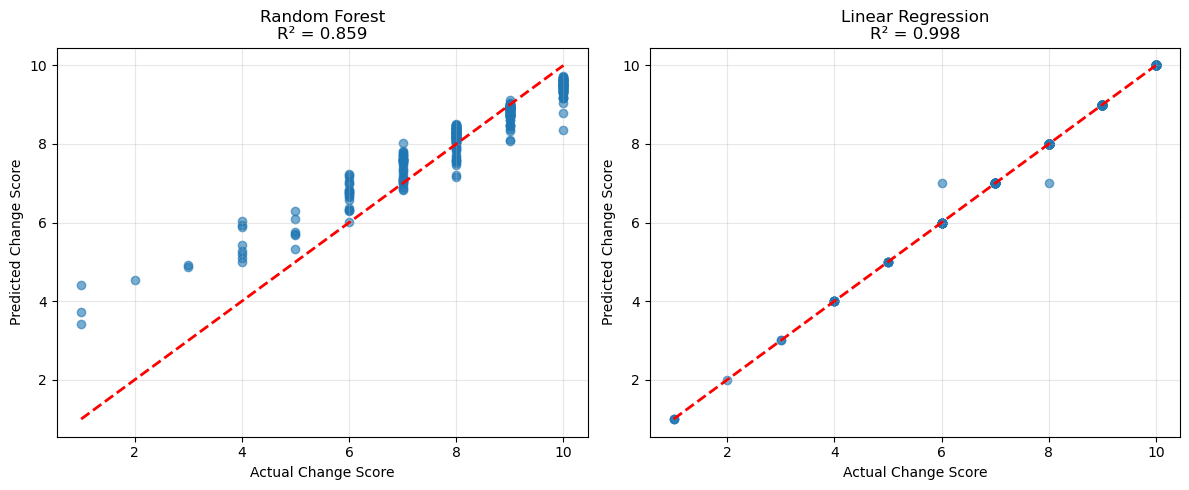

In [8]:
# Visualization
plt.figure(figsize=(12, 5))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(1, 2, i)
    plt.scatter(y, result['predictions'], alpha=0.6)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
    plt.xlabel('Actual Change Score')
    plt.ylabel('Predicted Change Score')
    plt.title(f'{name}\nR² = {result["r2"]:.3f}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


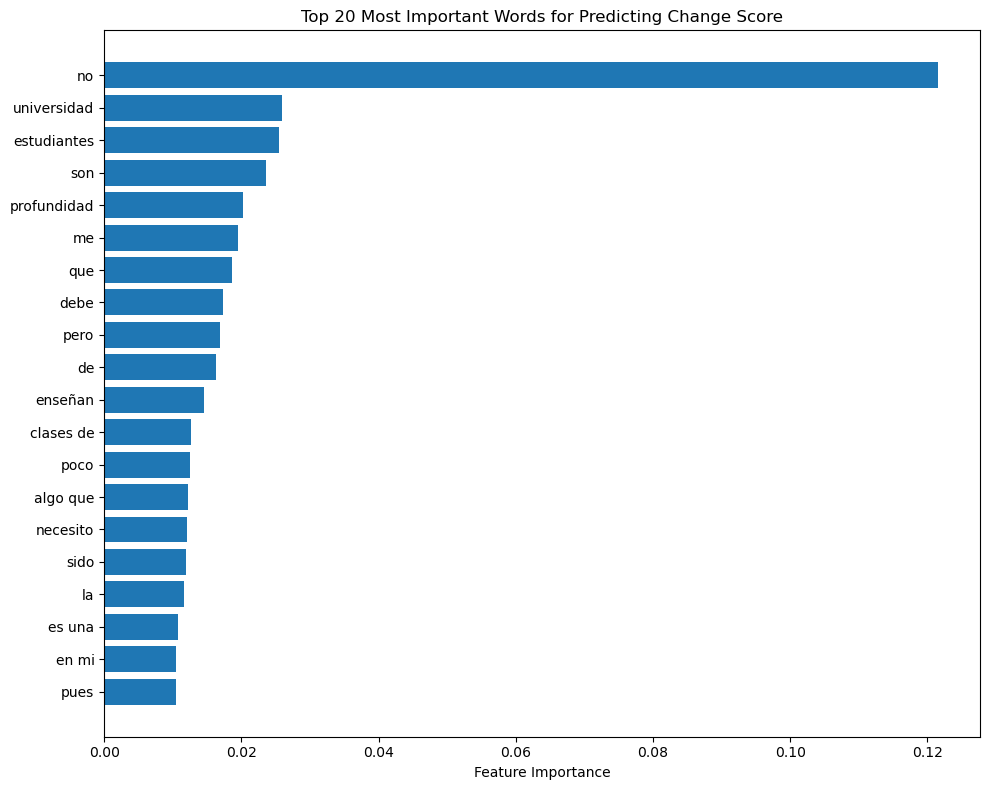

In [9]:
# Feature importance for Random Forest
rf_model = results['Random Forest']['model']
feature_names = vectorizer.get_feature_names_out()
importances = rf_model.feature_importances_

# Get top 20 most important features
top_indices = np.argsort(importances)[-20:]
top_features = [feature_names[i] for i in top_indices]
top_importances = importances[top_indices]

plt.figure(figsize=(10, 8))
plt.barh(range(len(top_features)), top_importances)
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Words for Predicting Change Score')
plt.tight_layout()
plt.show()


In [10]:
# Function to predict change score for new text
def predict_change_score(text, model_name='Random Forest'):
    """Predict change score for a given argument text"""
    processed_text = preprocess_text(text)
    text_vector = vectorizer.transform([processed_text])
    prediction = results[model_name]['model'].predict(text_vector)[0]
    return round(prediction, 2)

# Interactive prediction function
def analyze_argument(argument_text):
    """Analyze an argument and predict change score"""
    score = predict_change_score(argument_text)
    
    if score >= 8:
        level = "Alto impacto"
        color = "🟢"
    elif score >= 6:
        level = "Impacto moderado"
        color = "🟡"
    elif score >= 4:
        level = "Impacto bajo"
        color = "🟠"
    else:
        level = "Muy bajo impacto"
        color = "🔴"
    
    print(f"\n{color} Análisis del argumento:")
    print(f"Texto: '{argument_text[:100]}...' " if len(argument_text) > 100 else f"Texto: '{argument_text}'")
    print(f"Puntuación de cambio predicha: {score}/10")
    print(f"Nivel de impacto: {level}")
    
    return score

# Test with example
print("\n" + "="*50)
print("PREDICCIÓN DE EJEMPLO:")
example_text = "Aprendí mucho sobre sostenibilidad y ahora reciclo más"
analyze_argument(example_text)


PREDICCIÓN DE EJEMPLO:

🟢 Análisis del argumento:
Texto: 'Aprendí mucho sobre sostenibilidad y ahora reciclo más'
Puntuación de cambio predicha: 8.21/10
Nivel de impacto: Alto impacto


8.21

In [11]:
# Interfaz interactiva
entrada = Text(
    description='Question 14:',
    placeholder='Da una razón de tu cambio de mentalidad y sostenibilidad.',
    layout=Layout(width='600px')
)
out = Output()
boton = Button(
    description='Analizar cambio Inteligencia Ecológica',
    layout=Layout(width='300px')  # Set button width here
)

def analizar_ie(b):
    with out:
        out.clear_output()
        analyze_argument(entrada.value)

boton.on_click(analizar_ie)
display(VBox([entrada, boton, out]))